## Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the requests Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
 # Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url)
btc_response_content = btc_response_data.content
btc_data = btc_response_data.json()
import json
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18660550,
            "total_supply": 18660550,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 57812.0,
                    "volume_24h": 57670994247,
                    "market_cap": 1081114730676,
                    "percentage_change_1h": -0.802258766434313,
                    "percentage_change_24h": -1.6309040752968,
                    "percentage_change_7d": -5.71423726026909,
                    "percent_change_1h": -0.802258766434313,
                    "percent_change_24h": -1.6309040752968,
                    "percent_change_7d": -5.71423726026909
                },
                "CAD": {
                    "price": 72397.9676,
                    "volume_24h": 72221386095.5181,
                  

In [6]:
# Fetch current ETH price
eth_response_data = requests.get(eth_url)
eth_response_content = eth_response_data.content
eth_data = eth_response_data.json()
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115146572,
            "total_supply": 115146572,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1800.69,
                    "volume_24h": 30915142312,
                    "market_cap": 207913849369,
                    "percentage_change_1h": -0.773364502165437,
                    "percentage_change_24h": -1.93878139023347,
                    "percentage_change_7d": -6.58957186221188,
                    "percent_change_1h": -0.773364502165437,
                    "percent_change_24h": -1.93878139023347,
                    "percent_change_7d": -6.58957186221188
                },
                "CAD": {
                    "price": 2255.004087,
                    "volume_24h": 38715032717.3176,
             

In [7]:
# Compute current value of my crypto
btc_value = btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = btc_value * my_btc
eth_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = eth_value * my_eth

In [8]:

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69374.40
The current value of your 5.3 ETH is $9543.66


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [9]:
# Current amount of shares
my_SPY = 50
my_AGG = 200


In [10]:
 # Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST( alpaca_api_key, alpaca_secret_key, api_version="v2")

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = api.get_barset(tickers,timeframe,start=today,end=today,).df

# Preview DataFrame
portfolio_df.head()

AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [12]:
 # Pick AGG and SPY close prices
agg_close_price = float(portfolio_df["AGG"]["close"])
spy_close_price = float(portfolio_df["SPY"]["close"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [13]:
# Compute the current value of shares

my_agg_value = my_AGG * agg_close_price 
my_spy_value = my_SPY * spy_close_price 

# Print current value of share
print(f"The current value of your {my_SPY} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_AGG} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00


### Savings Health Analysis

In [14]:
 # Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_portfolio = my_btc_value + my_eth_value
stock_portfolio = my_spy_value + my_agg_value
data = {'amount': [crypto_portfolio,stock_portfolio]}
df_savings = pd.DataFrame(data, index=['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,78918.057
shares,42175.000


<AxesSubplot:title={'center':'composition of personal savings'}, ylabel='amount'>

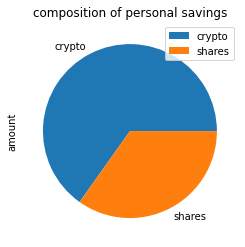

In [15]:
df_savings.plot.pie(y='amount',title='composition of personal savings')

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_portfolio + stock_portfolio

# Validate saving health

if emergency_fund < total_savings:
        print("Congratulations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("You are doing fine, still need more improvements through")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
 # Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY","AGG"]
stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Display sample data
stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207  342.13   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038  339.76   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671  332.10   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602  326.91   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417  328.28   

                                                                 
                               high     low    close     volume  
time                                                             
2020-10-26 00:00:00-04:00  342.9800  335.62  339.415   79491839  
2020-10-27 00:00:00-04:00  340.1200  337.99  338.250   50634843  
2020-10-28 00:00:00-04:00  338.2483  326.13  326.670  107939571  
2020-10-29 00:00:00-04:00  333.3950  325.09  329.990   74362731  
2020-10-30 00:00:00-04:00  329.6900  322.60  326.530   93413096

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(stock_data, weights = [.60,.40], num_simulation = 500, num_trading_days = 252*30 )

In [24]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997015,1.005738,1.002441,1.001182,0.997712,1.004121,0.993924,0.999913,0.998661,0.999001,...,0.994448,0.995817,1.002109,0.999422,1.000591,0.999244,0.999515,1.000867,1.004572,0.993060
2,0.995960,1.004329,0.998677,1.007186,1.001341,1.009225,0.992166,1.003520,1.007142,0.993754,...,0.994527,0.990648,1.000804,1.003363,0.998230,0.997703,1.002598,0.999419,1.005186,0.994489
3,0.995223,1.006027,0.991154,1.003996,0.996167,1.015598,0.993685,1.006472,1.007265,0.991394,...,0.997133,0.983006,1.004579,1.006402,0.991326,0.990482,0.998851,1.005927,1.012547,0.996897
4,0.995226,1.010052,0.994083,0.993053,0.997911,1.016468,0.984678,1.007481,1.015812,0.992013,...,0.997218,0.989472,1.008034,1.007621,0.993455,0.994722,1.005096,1.010886,1.027914,1.002894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.856816,28.754045,21.880089,12.023095,18.591830,18.459473,12.495704,13.903193,11.279707,11.168460,...,14.284371,20.897761,13.026637,18.262883,12.222565,15.053210,18.696455,21.356685,20.386312,14.364133
7557,10.879825,28.696259,21.936183,12.032143,18.556248,18.322713,12.431168,13.880384,11.332076,11.201188,...,14.157503,20.856733,13.012987,18.265977,12.184709,15.175536,18.698255,21.355896,20.470446,14.351893
7558,10.894011,28.729542,22.131844,11.992732,18.655447,18.420149,12.444531,13.851314,11.325069,11.214539,...,14.146791,20.910066,13.117699,18.286550,12.197370,15.158782,18.846226,21.222464,20.425674,14.334483
7559,10.914033,28.714525,22.229470,11.993059,18.676267,18.489948,12.385662,13.851151,11.323658,11.238608,...,14.137186,21.015264,13.120126,18.197261,12.282351,15.242101,18.988942,21.168041,20.377422,14.322771


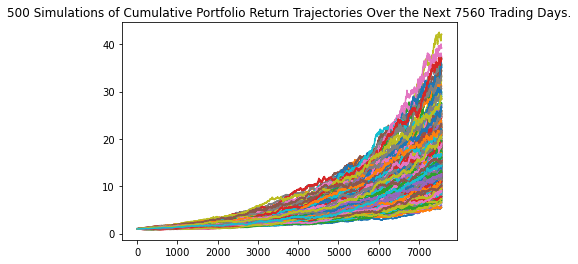

In [26]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

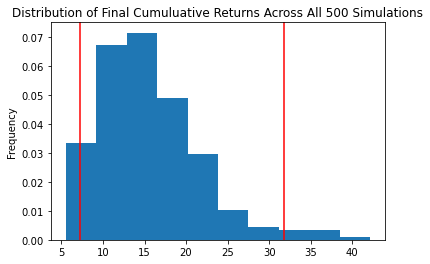

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

###  Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             15.623185
std               6.052524
min               5.529973
25%              11.328437
50%              14.622053
75%              18.554302
max              42.137135
95% CI Lower      7.214141
95% CI Upper     31.775032
Name: 7560, dtype: float64


###  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*(initial_investment),2)
ci_upper = round(even_tbl[9]*(initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $144282.83 and $635500.64


###  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment. 

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*(initial_investment),2)
ci_upper = round(even_tbl[9]*(initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $216424.24 and $953250.96


##  Optional Challenge - Early Retirement 

### Five Years Retirement Option 

In [37]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5Y = MCSimulation(stock_data, weights = [.60,.40], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_5Y.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996583,1.004941,1.004008,1.000376,1.005797,1.004242,0.997304,1.003052,0.998849,1.003557,...,0.997065,0.999039,1.007405,1.002948,0.994154,1.010565,0.998526,1.003854,0.997505,0.992849
2,1.000071,1.008677,1.008941,0.994333,1.013799,1.011650,1.001149,1.007863,0.999949,1.004662,...,0.994725,1.001481,1.004914,0.999270,0.998264,1.010023,0.996785,1.005846,1.000969,0.995107
3,1.001022,1.008725,1.012859,0.994364,1.015691,1.017278,1.003497,1.005484,1.004282,1.006946,...,0.992544,1.002143,1.010918,1.000990,1.002455,1.005526,1.000716,1.000265,0.994854,0.987505
4,0.999958,1.015379,1.017061,0.998494,1.011174,1.017893,1.004569,1.005155,1.001775,1.007402,...,0.998559,1.005457,1.011131,0.996346,0.991328,1.002347,0.999005,1.006635,0.997456,0.984772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.731773,1.340122,1.814948,1.341645,1.632451,1.827591,1.698926,1.336412,1.564148,1.390419,...,1.445272,1.546413,1.840475,1.484419,1.547879,1.816425,1.400748,1.314014,1.281815,1.847328
1257,1.742057,1.341911,1.819493,1.342285,1.634565,1.833988,1.697214,1.339287,1.555061,1.387051,...,1.438136,1.564515,1.844682,1.484865,1.556719,1.817257,1.389217,1.319375,1.278435,1.848387
1258,1.757789,1.335151,1.836520,1.345859,1.635352,1.844904,1.702446,1.355047,1.556050,1.388500,...,1.443264,1.577024,1.845672,1.494730,1.545555,1.811564,1.391647,1.317027,1.279943,1.860674
1259,1.761323,1.327701,1.834331,1.357509,1.630349,1.841907,1.691624,1.362257,1.549145,1.387992,...,1.446496,1.574187,1.840933,1.500667,1.551743,1.812907,1.388650,1.326079,1.282483,1.856738


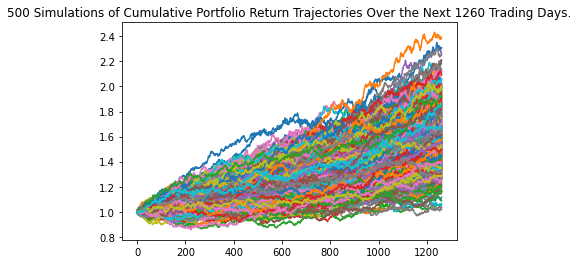

In [39]:
# Plot simulation outcomes
line_plot_5Y = MC_even_dist_5Y.plot_simulation()

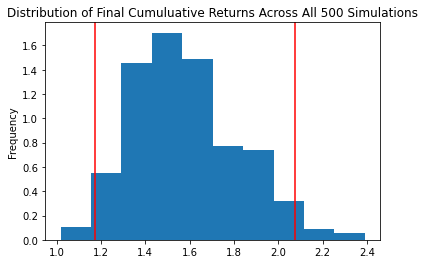

In [40]:
# Plot probability distribution and confidence intervals
dist_plot_5Y = MC_even_dist_5Y.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5Y = MC_even_dist_5Y.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_5Y)

count           500.000000
mean              1.579635
std               0.237786
min               1.017906
25%               1.401508
50%               1.554725
75%               1.741123
max               2.390188
95% CI Lower      1.172795
95% CI Upper      2.077163
Name: 1260, dtype: float64


In [44]:
# Set initial investment
initial_investment_5Y = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_5Y[8]*(initial_investment_5Y),2)
ci_upper_five = round(even_tbl_5Y[9]*(initial_investment_5Y),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5Y} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $70367.68 and $124629.76


###  Ten Years Retirement Option 

In [46]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10Y = MCSimulation(stock_data, weights = [.60,.40], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_10Y.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [47]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992480,1.001089,0.999498,1.009786,1.000918,1.007641,1.001953,1.000160,0.997714,0.995999,...,0.998977,0.999602,1.002055,1.004210,1.003070,0.990895,1.004422,0.997338,0.997857,0.995876
2,0.989121,0.998717,0.999888,1.008681,0.997674,1.009320,1.009225,1.005800,0.994405,0.989752,...,0.992382,1.008606,0.998698,0.999649,1.006748,0.989793,1.009590,0.999519,1.004631,0.998220
3,0.988552,1.001593,1.001205,0.999622,0.998445,1.000265,1.006423,1.007112,0.993872,0.986512,...,0.989485,1.018616,1.005857,0.995124,1.007037,0.991306,1.010156,1.000051,1.008690,0.998391
4,0.982949,1.003852,1.008213,1.005018,1.002690,1.008100,1.010428,1.015085,0.995286,0.980250,...,0.990636,1.021568,1.002240,0.991972,1.006865,0.996085,1.016077,1.005243,1.007215,0.998157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.430927,2.196060,2.057590,3.064836,2.021916,2.522383,3.283633,2.853533,2.172268,2.092798,...,2.060260,3.099930,2.197194,1.779798,2.363912,2.704762,2.100286,2.415444,2.977342,3.042012
2517,2.421600,2.206572,2.057688,3.055584,2.041195,2.520191,3.276954,2.854649,2.175900,2.095620,...,2.060168,3.100493,2.212256,1.783127,2.370981,2.714246,2.109502,2.401520,3.013708,3.038972
2518,2.412329,2.216108,2.048114,3.060194,2.056128,2.504355,3.296066,2.859322,2.186715,2.105462,...,2.077453,3.098504,2.212518,1.781743,2.387044,2.709785,2.114159,2.393877,2.995082,3.039415
2519,2.397553,2.219051,2.046836,3.057614,2.069675,2.491398,3.306466,2.869716,2.173350,2.111266,...,2.073274,3.107408,2.206125,1.792356,2.377685,2.717785,2.108391,2.403124,2.992331,3.037779


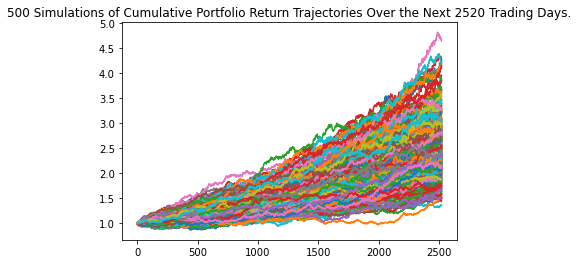

In [48]:
# Plot simulation outcomes
line_plot_10Y = MC_even_dist_10Y.plot_simulation()

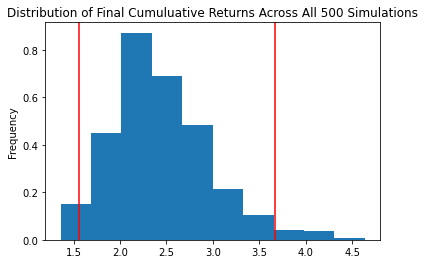

In [49]:
# Plot probability distribution and confidence intervals
dist_plot_10Y = MC_even_dist_10Y.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10Y = MC_even_dist_10Y.summarize_cumulative_return()
# Print summary statistics
print(even_tbl_10Y)

count           500.000000
mean              2.443491
std               0.528265
min               1.359219
25%               2.087427
50%               2.365638
75%               2.743477
max               4.637741
95% CI Lower      1.560104
95% CI Upper      3.674357
Name: 2520, dtype: float64


In [51]:
# Set initial investment
initial_investment_10Y = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_5Y[8]*(initial_investment_10Y),2)
ci_upper_five = round(even_tbl_5Y[9]*(initial_investment_10Y),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10Y} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $70367.68 and $124629.76
